# CitiBike Seaborn Visualization
## Table of Contents
01. Research Questions & Planned Visualizations
02. Libraires/ Imports
03. Data Inspection
04. Change Date Type
05. Set Theme & Palette
06. Top 20 Starting Stations
07. Bike Rides & Temp Dual-Axis Chart
08. Blox-Plot Chart
09. FacetGrid Chart

## 01. Research Questions & Planned Visualizations

1.	Which stations experience the highest demand?
    - Horizontal bar chart showing the top 10–20 start stations by trip count.
2.	How does ridership vary month to month, and how does weather influence it?
    - Dual-axis line chart
3.	What are the most common routes in NYC?
    - Map with route lines.
4.	Are CitiBike stations evenly distributed across the city?
    - Station density map (heatmap).
5.	How long are trips on average, and does this vary by neighborhood or time of year?
    - Boxplots of trip duration by month or by neighborhood.

## 02. Libraires/ Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
# Import merged csv
ny_merged_df = pd.read_csv("../02_Data/Prepared_Data/ny_data_merged.csv")

C:\Users\Chase\AppData\Local\Temp\ipykernel_25596\1607608041.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  ny_merged_df = pd.read_csv("../02_Data/Prepared_Data/ny_data_merged.csv")


## 03. Data Inspection

In [3]:
ny_merged_df.shape

(29838166, 17)

In [4]:
# Check columns
ny_merged_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'bike_rides_daily'],
      dtype='object')

In [5]:
ny_merged_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily
0,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,both,20428
1,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both,20428
2,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both,20428
3,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,2022-01-01,11.6,both,20428
4,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,both,20428


In [6]:
ny_merged_df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
bike_rides_daily        int64
dtype: object

## 04. Change Date Type

In [3]:
# Change the 'date' column to date-time
ny_merged_df['date'] = pd.to_datetime(ny_merged_df['date'], errors='coerce')

In [4]:
# Work check
ny_merged_df['date'].dtype

dtype('<M8[ns]')

In [5]:
# Double check the dates to ensure no year anomailes
ny_merged_df['date'].dt.year.unique()

array([2022], dtype=int32)

In [6]:
# Set date as index to build a proper time-series plot
weather_2022 = ny_merged_df.set_index('date')

In [7]:
# Set date as index to build a proper time-series plot
weather_2022 = ny_merged_df.set_index('date')# Work Check for date type change
ny_merged_df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
bike_rides_daily               int64
dtype: object

## 05. Set Theme & Palette

In [12]:
# set the theme and palette for plotting

sns.set_theme(style="whitegrid", palette="deep")

## 06. Top 20 Starting Stations

1. Which stations experience the highest demand?
    - Horizontal bar chart showing the top 10–20 start stations by trip count.
- NOTE: I will need to aggregate the stations to find the top 20 most frequent stations.

#### Aggregate Most Frequent Stations

In [13]:
# Agg the stations
ny_merged_df['value'] = 1
station_counts = ny_merged_df.groupby('start_station_name')['value'].count().reset_index()

In [14]:
# Sort the counts in ascending order
station_counts = station_counts.sort_values('value', ascending=False)

In [15]:
# Top 20 stations
top20 = station_counts.head(20)
print(top20)

            start_station_name   value
1587           W 21 St & 6 Ave  129016
1718     West St & Chambers St  123289
495         Broadway & W 58 St  114293
286            6 Ave & W 33 St  106440
8              1 Ave & E 68 St  104856
461         Broadway & E 14 St   98862
485         Broadway & W 25 St   98422
1511   University Pl & E 14 St   97120
463         Broadway & E 21 St   95691
1603           W 31 St & 7 Ave   94208
788            E 33 St & 1 Ave   91003
590   Cleveland Pl & Spring St   90973
29            12 Ave & W 40 St   90414
287            6 Ave & W 34 St   89683
1719      West St & Liberty St   87657
24            11 Ave & W 41 St   87577
1105     Lafayette St & E 8 St   87457
562     Central Park S & 6 Ave   87013
796         E 40 St & Park Ave   85598
328            8 Ave & W 33 St   85051


#### Bar Chart Plotting

C:\Users\Chase\AppData\Local\Temp\ipykernel_29940\3167262676.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Chase\AppData\Local\Temp\ipykernel_29940\3167262676.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


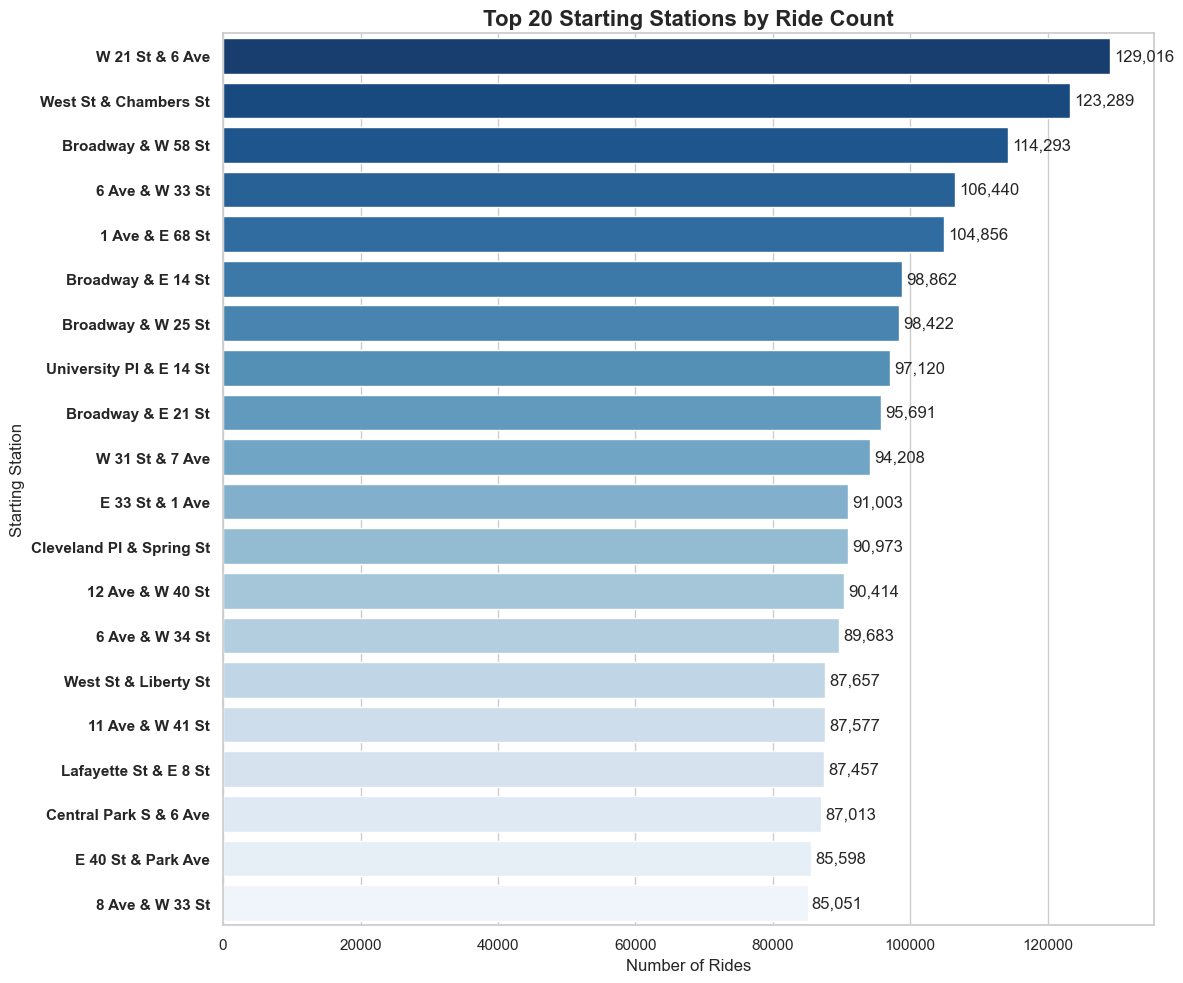

In [16]:
# Size of the chart needs to be large enough to fit everything
plt.figure(figsize=(12, 10))

# Bar chart plotting w/ a temp. palette Blues_r gradient (best to display this chart).
ax = sns.barplot(
     data=top20,
     x="value",
     y="start_station_name",
     palette="Blues_r" 
)

# Make station names bold (easier to read)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

# Adds station counts at the end of the bars and comma-formatted labels (easier to read)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f"{v:,.0f}" for v in container.datavalues],
        padding=3
    )


# Labels
plt.title("Top 20 Starting Stations by Ride Count", fontsize=16, fontweight='bold')
plt.xlabel("Number of Rides")
plt.ylabel("Starting Station")
plt.tight_layout()

# Save chart
plt.savefig(
    r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\04_Analysis\Visualizations\top20_starting_stations.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()

## 07. Bike Rides & Temp Dual-Axis Chart 

In [17]:
# Set index for plotting
df_temp = ny_merged_df[['date', 'bike_rides_daily', 'avgTemp']].drop_duplicates(subset='date')
df_temp = df_temp.set_index('date')

In [18]:
# Work Check
print(df_temp.columns)

Index(['bike_rides_daily', 'avgTemp'], dtype='object')


In [19]:
df_temp.head()

,bike_rides_daily,avgTemp
date,,
2022-01-01,20428,11.6
2022-01-02,43009,11.4
2022-01-03,33189,1.4
2022-01-04,36842,-2.7
2022-01-05,34230,3.2


#### Plotting

In [20]:
# Assign the palette from the selected choice above, "deep".
colors = sns.color_palette("deep")
blue = colors[0]     # deep blue
orange = colors[1]   # deep orange

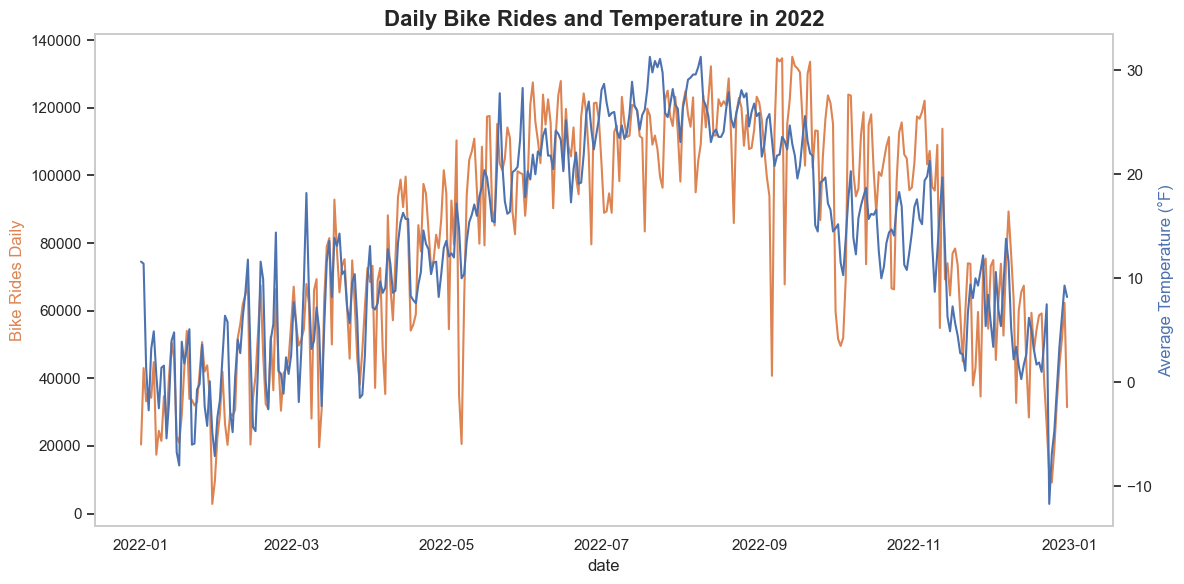

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# First line: Bike Rides - Orange
sns.lineplot(
    x=df_temp.index,
    y=df_temp['bike_rides_daily'],
    ax=ax1,
    color=orange
)
ax1.set_ylabel("Bike Rides Daily", color=orange)

# Second line: Avg Temps - Blue
ax2 = ax1.twinx()

sns.lineplot(
    x=df_temp.index,
    y=df_temp['avgTemp'],
    ax=ax2,
    color=blue
)
ax2.set_ylabel("Average Temperature (°F)", color=blue)

# Turn off grid lines for ax2 because it was causing overlapping lines
ax1.grid(False)
ax2.grid(False)

# Save dual-axis chart
plt.savefig(
    r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\04_Analysis\Visualizations\daily_bikerides_vs_temperature.png",
    dpi=300,
    bbox_inches='tight'
)

plt.title("Daily Bike Rides and Temperature in 2022", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## 08. Blox-Plot Chart

### Trip Duration
- Create a column for trip duration

In [8]:
# Convert to datetime
ny_merged_df['started_at'] = pd.to_datetime(ny_merged_df['started_at'])
ny_merged_df['ended_at'] = pd.to_datetime(ny_merged_df['ended_at'])

In [9]:
# Compute trip duration in minutes
ny_merged_df['tripduration'] = (
    ny_merged_df['ended_at'] - ny_merged_df['started_at']
).dt.total_seconds() / 60

In [10]:
# Work check and summary stats
ny_merged_df['tripduration'].describe()

count    2.983817e+07
mean     1.820962e+01
std      2.614485e+02
min     -5.728892e+01
25%      5.796733e+00
50%      1.016200e+01
75%      1.799900e+01
max      4.044810e+05
Name: tripduration, dtype: float64

In [11]:
# Longest trips, checking for outliers
ny_merged_df['tripduration'].sort_values(ascending=False).head(10)

1913636     404481.005867
7391362     245844.489567
5278571     222963.355517
5278572     221708.067467
6423444     218938.468033
7579651     217665.979000
16155067    212724.723550
14152166    211816.309650
6328787     211415.575483
13116483    196583.615600
Name: tripduration, dtype: float64

In [12]:
# Shortest trips, checking for outliers
ny_merged_df['tripduration'].sort_values(ascending=True).head(10)

26523404   -57.288917
26490860   -57.176633
26458656   -57.130933
26513326   -56.633100
26534763   -56.613833
26500574   -56.168400
26493755   -55.761283
26450855   -55.675700
26480441   -55.675233
26501993   -55.650483
Name: tripduration, dtype: float64

In [13]:
# Filter the tripduration to: 0-1440 mins, for a more vaild timeframe 
tripdur_filtered_df = ny_merged_df[
    (ny_merged_df['tripduration'] > 0) &
    (ny_merged_df['tripduration'] <= 1440)
]

In [14]:
# Work check and summary stats
tripdur_filtered_df['tripduration'].describe()

count    2.979804e+07
mean     1.548595e+01
std      3.327495e+01
min      1.488333e-01
25%      5.791717e+00
50%      1.014797e+01
75%      1.795090e+01
max      1.439954e+03
Name: tripduration, dtype: float64

In [15]:
# Filter to trips within 1.5 standard deviations above the mean
upper_bound = 15.5 + (1.5 * 33.3)  # ≈ 65.5 minutes

tripdur_focus_df = tripdur_filtered_df[
    (tripdur_filtered_df['tripduration'] >= 1) &
    (tripdur_filtered_df['tripduration'] <= upper_bound)
]

After filtering the data I noticed that there were some extreme outlier, espeically after I plotted it. So I've filtered/focused the data again to 1.5 std of the mean to give a better range.

In [16]:
# Work check and summary stats for the focused range
tripdur_focus_df['tripduration'].describe()

count    2.937136e+07
mean     1.330825e+01
std      1.077623e+01
min      1.000233e+00
25%      5.737383e+00
50%      9.997167e+00
75%      1.744687e+01
max      6.544997e+01
Name: tripduration, dtype: float64

In [17]:
tripdur_focus_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily,tripduration
0,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,both,20428,3.831733
1,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both,20428,24.885933
2,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,both,20428,11.776867
3,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,2022-01-01,11.6,both,20428,25.322883
4,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,both,20428,3.258917


In [18]:
# keep the needed columns
cols_to_keep = ['member_casual', 'tripduration', 'date']
tripdur_focus_clean = tripdur_focus_df[cols_to_keep].copy()

In [19]:
tripdur_focus_clean.head()

,member_casual,tripduration,date
0,member,3.831733,2022-01-01
1,member,24.885933,2022-01-01
2,member,11.776867,2022-01-01
3,member,25.322883,2022-01-01
4,member,3.258917,2022-01-01


#### Export

In [20]:
tripdur_focus_clean.to_csv(
    "../02_Data/Prepared_Data/tripduration_focus.csv",
    index=False
)

### Box Plot

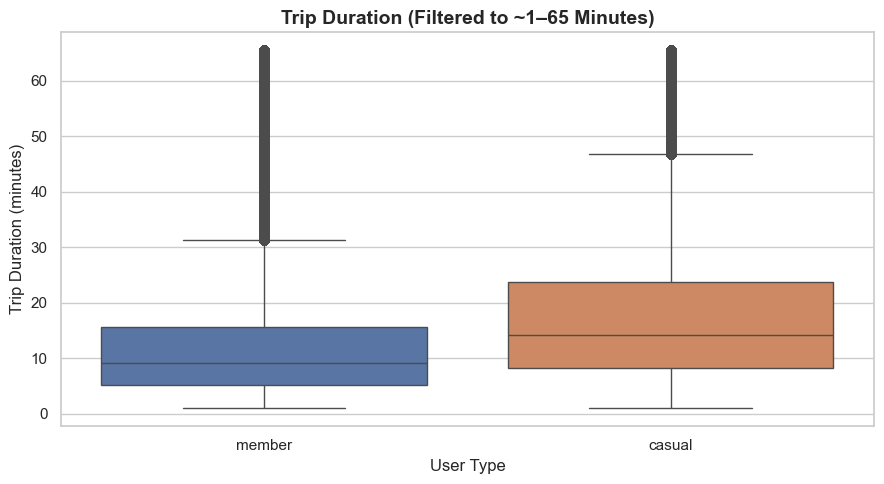

In [31]:
# Box plot: Tripduration / member_casual
plt.figure(figsize=(9,5))
sns.boxplot(
    data=tripdur_focus_df,
    x='member_casual',
    y='tripduration',
    hue='member_casual',
    palette='deep',
    legend=False
)

# Save focused trip duration box plot
plt.savefig(
    r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\04_Analysis\Visualizations\tripduration_boxplot_focused.png",
    dpi=300,
    bbox_inches='tight'
)

plt.title("Trip Duration (Filtered to ~1–65 Minutes)", fontsize=14, fontweight="bold")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (minutes)")
plt.tight_layout()
plt.show()

Looking at the box plot, it's clear that there is a behavioral difference between the two user groups. Casual riders have a higher median trip duration, suggesting they tend to take longer rides, possibly for leisure or exploration. Member riders show a lower median and a tighter distribution, indicating more consistent and shorter trips likely tied to routine commuting.

## 09. FacetGrid Chart

A FacetGrid lets you compare two categories side by side by putting them into separate but matching plots, like two histograms next to each other. It’s a clean way to see how a variable behaves across different groups because everything stays on the same scale, so differences stand out right away. This makes it easier to spot patterns in subsets of the data that would get lost if everything were stacked into one chart.

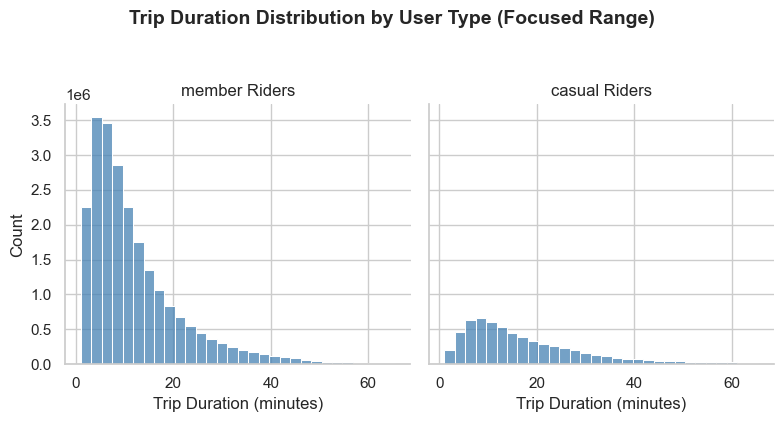

In [33]:
# Plot the facetgrid
grid = sns.FacetGrid(tripdur_focus_df, col="member_casual", height=4, aspect=1)
grid.map(sns.histplot, "tripduration", bins=30, color="steelblue")

grid.set_axis_labels("Trip Duration (minutes)", "Count")
grid.set_titles(col_template="{col_name} Riders")

plt.suptitle("Trip Duration Distribution by User Type (Focused Range)", 
             y=1.05, fontsize=14, fontweight="bold")
plt.tight_layout()

# Save
grid.fig.savefig(
    r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\04_Analysis\Visualizations\facetgrid_tripduration_by_user.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()

Looking at this chart, it confirms our assumptions from the box plot results. Members likely use CitiBike as part of their daily routine, while casual riders tend to treat it more as a luxury or recreational option.

## Export

I have created new columns that need to be retained: value and trip duration. So I will export a new csv and add v2 to it. I also created a filtered subset for tripduration that I will keep.

In [36]:
# Export the new main dataset
ny_merged_df.to_csv( r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\02_Data\Prepared_Data\ny_data_merged_v2.csv", index=False )

In [37]:
# Export subset
tripdur_filtered_df.to_csv(
    r"C:\Users\Chase\anaconda_projects\Data Visualizations with Python\Achievement 2\CitiBike\02_Data\Prepared_Data\tripdur_filtered_df.csv",
    index=False
)